In [138]:
%matplotlib inline

from modsim import *

In [139]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second

In [161]:
condition = Condition(x = 0 * m, 
                      g = 9.8 * m/s**2,
                      mass = 36559.55 * kg,
                      velocity = 0 * m / s,
                      acceloration = .263713 * m/s**2,
                      duration = 500 * s)

In [162]:
def make_system(condition):
    """Makes a System object for the given conditions.
    
    condition: Condition with height, v_init, g, mass, diameter, 
               rho, C_d, and duration
    
    returns: System with init, g, mass, rho, C_d, area, and ts
    """
    unpack(condition)
    
    init = State(x=x, v=velocity)
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass,
                  C_d=C_d, ts=ts)


In [163]:
system = make_system(condition)
system

,value
init,x 0 meter v 0.0 meter / secon...
g,9.8 meter / second ** 2
mass,36559.55 kilogram
C_d,0.5
ts,"[0.0 second, 5.0 second, 10.0 second, 15.0 sec..."


In [174]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    x, v = state
    unpack(system)
    
    """ f_friction = C_d * mass * g
    a_friction = f_friction / mass"""
    
    dxdt = v
   

    if v<84.7222 * m/s:
        dvdt = acceloration 
    else:
        dvdt = 0 
    
    return dxdt, dvdt

In [175]:
slope_func(system.init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(0.263713, 'meter / second ** 2')>)

In [176]:
run_odeint(system, slope_func)

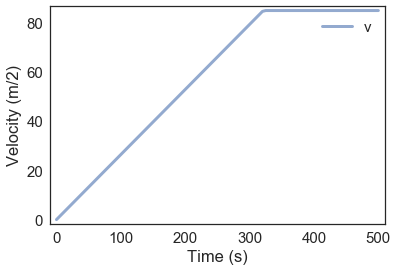

In [177]:
def plot_velocity(results):
    """Plot the results.
    
    results: DataFrame with velocity, v
    """
    newfig()
    plot(results.v, label='v')
        
    decorate(xlabel='Time (s)',
             ylabel='Velocity (m/2)')
    
plot_velocity(system.results)

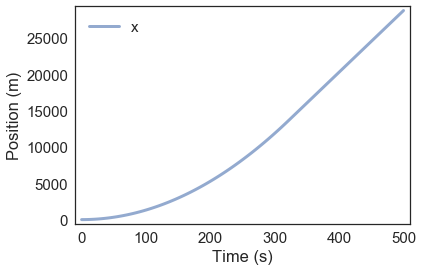

In [178]:
def plot_position(results):
    """Plot the results.
    
    results: DataFrame with position, `y`
    """
    newfig()
    plot(results.x, label='x')
        
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')
    
plot_position(system.results)

ZOMBIES

In [182]:
zombie = System(zMass = 68.5 * kg,
                zC_d = .85,
                zTime = 60 * s,
                g = 9.8 * m/s**2)

In [183]:
def make_Zsystem(system):
    
    unpack(system)
    
    return System(g=g, zMass=zMass,
                  zC_d=zC_d, zTime = zTime)
